In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_rt_movie_info = pd.read_csv('data/rt.movie_info.tsv.gz',sep='\t')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN


In [3]:
df_rt_movie_info.shape

(1560, 12)

In [4]:
df_rt_movie_info['genre'][0]

'Action and Adventure|Classics|Drama'

In [5]:
# removing the month and day from the theater_date and create a new column with just the year of the release date
df_rt_movie_info['new_theater_date'] = df_rt_movie_info.theater_date.str[-4:]

In [6]:
df_rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,new_theater_date
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,1971
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2012
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,1996
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,1994
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN,NaN


In [7]:
# convert the values in the 'new_theater_date' column from strings to integers
df_rt_movie_info['new_theater_date'] = df_rt_movie_info['new_theater_date'].apply(pd.to_numeric)

In [8]:
df_rt_movie_info['new_theater_date'].value_counts()

2003.0    40
2000.0    38
2009.0    35
2001.0    35
2002.0    34
          ..
1930.0     1
1936.0     1
1961.0     1
1922.0     1
1949.0     1
Name: new_theater_date, Length: 91, dtype: int64

In [10]:
df_rt_movie_info.shape

(1560, 13)

In [11]:
df_rt_movie_info = df_rt_movie_info[df_rt_movie_info['new_theater_date']>2010]

In [12]:
df_rt_movie_info.shape

(171, 13)

In [13]:
# deleting irrelevent to our needs columns ('currency','dvd_date','box_office')
del df_rt_movie_info['currency']
del df_rt_movie_info['dvd_date']
del df_rt_movie_info['box_office']

In [14]:
# there are 494 out of 1560 rows that have a missing studio value

df_rt_movie_info['studio'].isna().value_counts()

False    135
True      36
Name: studio, dtype: int64

In [15]:
df_rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,runtime,studio,new_theater_date
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,2012.0
16,23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,"Dec 20, 2013",129 minutes,Sony Pictures,2013.0
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013",127 minutes,Universal Pictures,2013.0
41,54,Journalist Jep Gambardella (the dazzling Toni ...,NR,Comedy|Drama,Paolo Sorrentino,Paolo Sorrentino|Umberto Contarello,"Nov 15, 2013",142 minutes,Janus Films,2013.0
44,57,Life doesn't always go according to plan. Pat ...,R,Comedy,NaN,NaN,"Nov 21, 2012",122 minutes,The Weinstein Company,2012.0


In [16]:
# the 
df_rt_movie_info['studio'].value_counts().head(30)

Sony Pictures Classics                     11
Universal Pictures                         11
Sony Pictures                               8
20th Century Fox                            7
The Weinstein Company                       6
IFC Films                                   5
Magnolia Pictures                           4
Paramount Pictures                          4
Walt Disney Pictures                        4
Warner Bros.                                4
Open Road Films                             3
Warner Bros. Pictures                       3
Roadside Attractions                        3
Independent Pictures                        2
Fox Searchlight                             2
CBS Films                                   2
A24 Films                                   2
Fox Searchlight Pictures                    2
Phase 4 Films                               2
Broad Green Pictures                        2
Lionsgate Films                             2
Lionsgate/Roadside Attractions    

In [17]:
df_rt_reviews = pd.read_csv('data/rt.reviews.tsv.gz',sep='\t',encoding='latin1')

In [18]:
df_rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [19]:
df_rt_reviews[df_rt_reviews['rating'].isna()]

,id,review,rating,fresh,critic,top_critic,publisher,date
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
...,...,...,...,...,...,...,...,...
54409,2000,"A lightweight, uneven action comedy that freel...",NaN,rotten,Daniel Eagan,0,Film Journal International,"October 5, 2002"
54417,2000,"The funny thing is, I didn't mind all this con...",NaN,fresh,Andrew Sarris,1,Observer,"October 2, 2002"
54425,2000,Despite Besson's high-profile name being Wasab...,NaN,fresh,Andy Klein,0,New Times,"September 26, 2002"
54426,2000,The film lapses too often into sugary sentimen...,NaN,rotten,Paul Malcolm,1,L.A. Weekly,"September 26, 2002"


In [20]:
# remove all rows that have a null value in the 'rating' column
df_rt_reviews = df_rt_reviews[df_rt_reviews['rating'].notna()]
df_rt_reviews.shape

(40915, 8)

In [21]:
df_rt_reviews.loc[df_rt_reviews ['rating'] == 'T']

,id,review,rating,fresh,critic,top_critic,publisher,date
47013,1765,"upposed to be a horror-comedy film, but it's n...",T,rotten,Jeff Vice,0,Deseret News (Salt Lake City),"January 1, 2000"


In [22]:
#split the "rating" column into two separate columns, separating them in "/" if the rating is not a letter
df_rt_reviews[['fn','sn']] = df_rt_reviews['rating'].str.split('/',expand=True)

/Users/aishabaitemirova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [23]:
df_rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date,fn,sn
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3,5
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",C,None
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2,5
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013",B-,None
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",2,4
...,...,...,...,...,...,...,...,...,...,...
54424,2000,Dawdles and drags when it should pop; it doesn...,1.5/5,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002",1.5,5
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005",1,5
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005",2,5
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003",2.5,5


In [24]:
# replace the null values in the 'sn'(second number) with number 1. The row of the column 'sn' has a null value 
# only if the corresponding 'rating' column has a letter rating.
df_rt_reviews['sn'] = df_rt_reviews.sn.apply(lambda x: x if not pd.isnull(x) else 1)

<ipython-input-24-d846b0d48b0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt_reviews['sn'] = df_rt_reviews.sn.apply(lambda x: x if not pd.isnull(x) else 1)


In [25]:
# The letters we have: A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F+,F,F-
# A+ gets 1, A gets 93.34, A- gets 86.68, B+ gets 80.02, B gets 73.36, B- gets 66.7, 
#C+ gets 60.04
# C gets 53.38, C- gets 46.72, D+ gets 40.06, D gets 33.4, D- gets 26.74
# F+ gets 20.08, F gets 13.42, F- gets 6.66

In [26]:
# replacing the letter ratings with the appropriate percentage explained in the above cell
df_rt_reviews['fn'] = df_rt_reviews['fn'].replace(['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F+','F','F-'],[1,0.9334,0.8668,0.8002,0.7336,0.667,0.6004,0.5338,0.4672,0.4006,0.334,0.2674,0.2008,0.1342,0.666])

<ipython-input-26-f1c6aa438692>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt_reviews['fn'] = df_rt_reviews['fn'].replace(['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F+','F','F-'],[1,0.9334,0.8668,0.8002,0.7336,0.667,0.6004,0.5338,0.4672,0.4006,0.334,0.2674,0.2008,0.1342,0.666])


In [27]:
# deleting a row with an outlier value in the 'fn' column which is giving an error 
# when trying to convert all string values into numeric values
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != 'N']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != 'R']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != '1-5']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != 'T']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != '3 1']

In [28]:
# converting all string values in the 'fn' and 'sn' columns into numeric values
df_rt_reviews['fn'] = df_rt_reviews['fn'].apply(pd.to_numeric)
df_rt_reviews['sn'] = df_rt_reviews['sn'].apply(pd.to_numeric)

In [29]:
df_rt_reviews['new_rating'] = df_rt_reviews.apply(lambda row: row.fn/row.sn, axis=1)

In [30]:
# delete rows that have a new_rating value higher than 1
df_rt_reviews = df_rt_reviews[df_rt_reviews.new_rating <=1]

In [31]:
df_rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date,fn,sn,new_rating
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3.0000,5,0.6000
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",0.5338,1,0.5338
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2.0000,5,0.4000
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013",0.6670,1,0.6670
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",2.0000,4,0.5000


In [32]:
#creating a new dataset with only 'id' and 'new_rating' columns of the 'df_rt_reviews' dataset
# so we can merge it later on with the 'df_rt_movie_info' dataset.
new_rt_reviews = pd.DataFrame(zip(df_rt_reviews.id, df_rt_reviews.new_rating))

In [33]:
# renaming the columns back into original names
new_rt_reviews.rename(columns={0: 'id', 1: 'rating'}, inplace=True)

In [34]:
new_rt_reviews.head()

,id,rating
0,3,0.6000
1,3,0.5338
2,3,0.4000
3,3,0.6670
4,3,0.5000


In [35]:
df_rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,runtime,studio,new_theater_date
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,2012.0
16,23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,"Dec 20, 2013",129 minutes,Sony Pictures,2013.0
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013",127 minutes,Universal Pictures,2013.0
41,54,Journalist Jep Gambardella (the dazzling Toni ...,NR,Comedy|Drama,Paolo Sorrentino,Paolo Sorrentino|Umberto Contarello,"Nov 15, 2013",142 minutes,Janus Films,2013.0
44,57,Life doesn't always go according to plan. Pat ...,R,Comedy,NaN,NaN,"Nov 21, 2012",122 minutes,The Weinstein Company,2012.0


In [36]:
new_rt_movie_info= pd.DataFrame(zip(df_rt_movie_info.id, df_rt_movie_info.genre,df_rt_movie_info.runtime))

In [37]:
new_rt_movie_info.head()

,0,1,2
0,3,Drama|Science Fiction and Fantasy,108 minutes
1,23,Drama,129 minutes
2,25,Action and Adventure|Drama|Science Fiction and...,127 minutes
3,54,Comedy|Drama,142 minutes
4,57,Comedy,122 minutes


In [38]:
# renaming the columns back into original names
new_rt_movie_info.rename(columns={0: 'id', 1: 'genres',2: 'runtime'}, inplace=True)

In [39]:
new_rt_movie_info.head()

,id,genres,runtime
0,3,Drama|Science Fiction and Fantasy,108 minutes
1,23,Drama,129 minutes
2,25,Action and Adventure|Drama|Science Fiction and...,127 minutes
3,54,Comedy|Drama,142 minutes
4,57,Comedy,122 minutes


In [40]:
# left joining the new_rt_movie_info to new_rt_reviews
merged_datasets = pd.merge(new_rt_reviews,new_rt_movie_info,on='id',how='left')

In [41]:
merged_datasets.head()

,id,rating,genres,runtime
0,3,0.6000,Drama|Science Fiction and Fantasy,108 minutes
1,3,0.5338,Drama|Science Fiction and Fantasy,108 minutes
2,3,0.4000,Drama|Science Fiction and Fantasy,108 minutes
3,3,0.6670,Drama|Science Fiction and Fantasy,108 minutes
4,3,0.5000,Drama|Science Fiction and Fantasy,108 minutes


In [42]:
# first step in splitting the genres of each row into separate rows for each genre of each movie: 
# we are creating a list out of each genres string such as this: 'Action and Adventure|Classics|Drama'
merged_datasets['genres']=merged_datasets['genres'].str.split('|')

In [43]:
merged_datasets['genres']

0        [Drama, Science Fiction and Fantasy]
1        [Drama, Science Fiction and Fantasy]
2        [Drama, Science Fiction and Fantasy]
3        [Drama, Science Fiction and Fantasy]
4        [Drama, Science Fiction and Fantasy]
                         ...                 
40280                                     NaN
40281                                     NaN
40282                                     NaN
40283                                     NaN
40284                                     NaN
Name: genres, Length: 40285, dtype: object

In [44]:
# second step in splitting the genres of each row into separate rows for each genre of each movie: 
merged_datasets = merged_datasets.explode('genres')

In [45]:
merged_datasets

,id,rating,genres,runtime
0,3,0.6000,Drama,108 minutes
0,3,0.6000,Science Fiction and Fantasy,108 minutes
1,3,0.5338,Drama,108 minutes
1,3,0.5338,Science Fiction and Fantasy,108 minutes
2,3,0.4000,Drama,108 minutes
...,...,...,...,...
40280,2000,0.3000,NaN,NaN
40281,2000,0.2000,NaN,NaN
40282,2000,0.4000,NaN,NaN
40283,2000,0.5000,NaN,NaN


In [46]:
# getting rid of text characters in the 'runtime' column 
merged_datasets['runtime'] = merged_datasets['runtime'].str.replace(' minutes','')

In [47]:
# converting the 'runtime' column's strings values into floats
merged_datasets['runtime'] = pd.to_numeric(merged_datasets['runtime'])

In [48]:
merged_datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49689 entries, 0 to 40284
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       49689 non-null  int64  
 1   rating   49689 non-null  float64
 2   genres   20517 non-null  object 
 3   runtime  19295 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.9+ MB


In [49]:
# finding the standard deviation of the 'runtime' column without excluding any rows
merged_datasets['runtime'].std()

18.122329729219

In [50]:
merged_datasets['runtime'].mean()

112.07235034983157

In [51]:
merged_datasets['genres'].value_counts()
# the value count of movies by genre. The last four genre categories are too low in numbers compared to
# other movie genres
# We think it is best to remove them from our dataset

Drama                          6558
Comedy                         4019
Mystery and Suspense           1719
Action and Adventure           1662
Science Fiction and Fantasy    1468
Romance                        1223
Horror                          851
Kids and Family                 832
Animation                       626
Art House and International     624
Western                         287
Musical and Performing Arts     233
Documentary                     144
Special Interest                113
Sports and Fitness              101
Faith and Spirituality           57
Name: genres, dtype: int64

In [52]:
# creating a list of genres that are not statistically significant
not_significant_genres_list = ['Anime and Manga','Gay and Lesbian','Cult Movies','Faith and Spirituality','Television','Sports and Fitness','Documentary','Western','Special Interest']

In [53]:
# deleting the not statistically insignificant genres from the dataset and creating a new dataset without those genres
new_merged_datasets = merged_datasets[~merged_datasets.genres.isin(not_significant_genres_list)]

In [54]:
new_merged_datasets['genres'].value_counts()

Drama                          6558
Comedy                         4019
Mystery and Suspense           1719
Action and Adventure           1662
Science Fiction and Fantasy    1468
Romance                        1223
Horror                          851
Kids and Family                 832
Animation                       626
Art House and International     624
Musical and Performing Arts     233
Name: genres, dtype: int64

In [76]:
# finding the mean of runtime for each genre
average_runtime_per_genre = new_merged_datasets.groupby('genres', as_index=False)['runtime'].mean()
average_runtime_per_genre

,genres,runtime
0,Action and Adventure,126.848214
1,Animation,93.115016
2,Art House and International,110.498397
3,Comedy,105.119537
4,Drama,114.414660
5,Horror,101.836941
6,Kids and Family,101.458272
7,Musical and Performing Arts,106.309013
8,Mystery and Suspense,122.051546
9,Romance,110.314800


In [56]:
# renaming the 'runtime' column into the 'mean_runtime'
average_runtime_per_genre.rename(columns={'runtime': 'mean_runtime'}, inplace=True)


In [77]:
# finding the mean of the ratings for each genre
average_rating_per_genre = new_merged_datasets.groupby('genres', as_index=False)['rating'].mean()
average_rating_per_genre

,genres,rating
0,Action and Adventure,0.626124
1,Animation,0.615110
2,Art House and International,0.688895
3,Comedy,0.645007
4,Drama,0.689163
5,Horror,0.574896
6,Kids and Family,0.610897
7,Musical and Performing Arts,0.530884
8,Mystery and Suspense,0.682770
9,Romance,0.731152


In [58]:
# renaming the "rating" column into the 'mean_rating'
average_rating_per_genre.rename(columns={'rating': 'mean_rating'}, inplace=True)


In [59]:
average_runtime_per_genre

,genres,mean_runtime
0,Action and Adventure,126.848214
1,Animation,93.115016
2,Art House and International,110.498397
3,Comedy,105.119537
4,Drama,114.414660
5,Horror,101.836941
6,Kids and Family,101.458272
7,Musical and Performing Arts,106.309013
8,Mystery and Suspense,122.051546
9,Romance,110.314800


In [60]:
average_rating_per_genre

,genres,mean_rating
0,Action and Adventure,0.626124
1,Animation,0.615110
2,Art House and International,0.688895
3,Comedy,0.645007
4,Drama,0.689163
5,Horror,0.574896
6,Kids and Family,0.610897
7,Musical and Performing Arts,0.530884
8,Mystery and Suspense,0.682770
9,Romance,0.731152


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

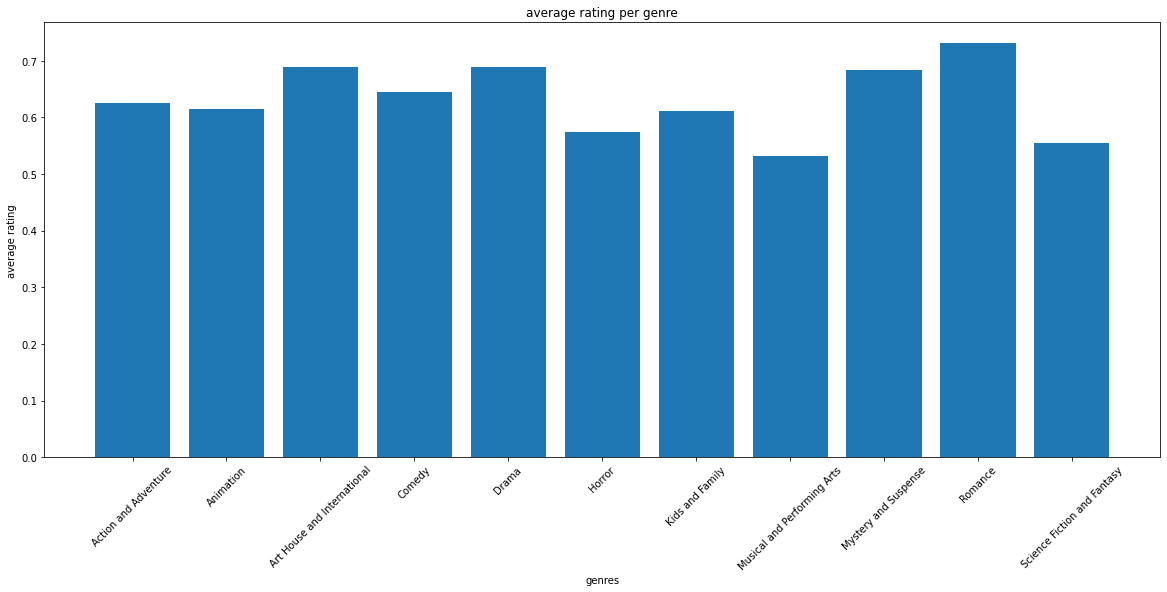

In [61]:
fig, ax1 = plt.subplots(figsize = (20,8))
x1 = average_rating_per_genre['genres']
y1 = average_rating_per_genre['mean_rating']
ax1.bar(x1,y1)
ax1.set_title('average rating per genre')
ax1.set_xlabel('genres')
ax1.set_ylabel('average rating')
plt.xticks(rotation = 45)

In [62]:
# The 4 genres that have the highest average ratings: 'Romance', 'Art House and International', 'Drama',
#  and 'Mystery and Suspense'


In [63]:
# creating a list of the four genres with the highest rating
four_genres_list = ['Romance','Art House and International','Drama','Mystery and Suspense']

In [64]:
# creating a dataset with only the four genres with the highest ratings
highest_rating_genres_dataset = merged_datasets[merged_datasets.genres.isin(four_genres_list)]

In [65]:
highest_rating_genres_dataset['genres'].value_counts()

Drama                          6558
Mystery and Suspense           1719
Romance                        1223
Art House and International     624
Name: genres, dtype: int64

In [66]:
# the mean of runtime for the four highest rating genres
highest_rating_genres_dataset['runtime'].mean()

114.92943063352045

In [67]:
# standard deviation from the mean for the four highest rating genres
highest_rating_genres_dataset['runtime'].std()

16.959395172828845

In [68]:
# getting an average runtime for each of the four highest rating genres
avg_runtime_high_rating_genres = highest_rating_genres_dataset.groupby('genres', as_index=False)['runtime'].mean()

In [69]:
# renaming the 'runtime' column of the new dataset into the "mean_runtime" 
avg_runtime_high_rating_genres.rename(columns={'runtime': 'mean_runtime'}, inplace=True)

In [70]:
avg_runtime_high_rating_genres

,genres,mean_runtime
0,Art House and International,110.498397
1,Drama,114.414660
2,Mystery and Suspense,122.051546
3,Romance,110.314800


([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

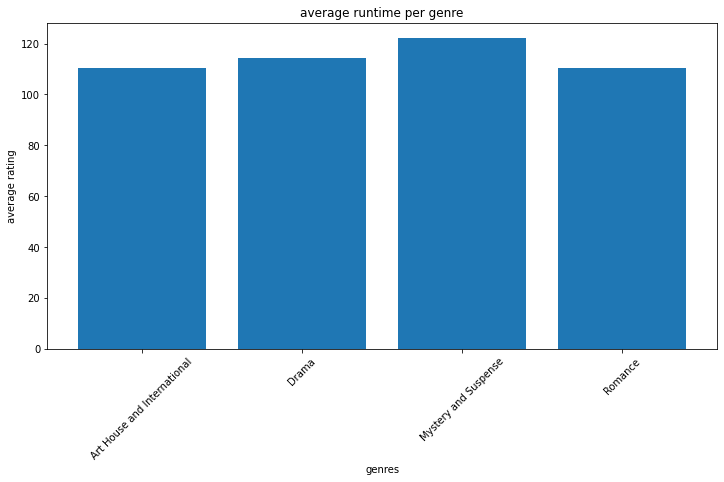

In [71]:
fig, ax2 = plt.subplots(figsize = (12,6))
x2 = avg_runtime_high_rating_genres['genres']
y2 = avg_runtime_high_rating_genres['mean_runtime']
ax2.bar(x2,y2)
ax2.set_title('average runtime per genre')
ax2.set_xlabel('genres')
ax2.set_ylabel('average rating')
plt.xticks(rotation = 45)